#Restaurants Recommendation System  

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the csv files from all three category
#Restaurants
chefmozaccepts_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/chefmozaccepts.csv')
chefmozcuisine_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/chefmozcuisine.csv')
chefmozhours4_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/chefmozhours4.csv')
chefmozparking_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/chefmozparking.csv')
geoplaces2_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/geoplaces2.csv',encoding='latin-1')
#User-Item-Rating
rating_final_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/rating_final.csv')
#Consumers 
usercuisine_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/usercuisine.csv')
userpayment_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/userpayment.csv')
userprofile_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FDS data/project/userprofile.csv')

### Explore the Restaurent files
#### chefmozaccepts.csv dataset

In [ ]:
#Getting first five rows
chefmozaccepts_df.head()

,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards


There are 2 columns in the dataset, Restaurant ID and 

In [ ]:
#Getting information of shape 
chefmozaccepts_df.shape

(1314, 2)

Total 1314 rows

In [ ]:
#checking for null value
chefmozaccepts_df.isnull().sum()

placeID     0
Rpayment    0
dtype: int64

In [ ]:
#Getting dtypes of this columns
chefmozaccepts_df.dtypes

placeID      int64
Rpayment    object
dtype: object

In [ ]:
#Describe the dataset
chefmozaccepts_df['Rpayment'].describe()

count     1314
unique      12
top       cash
freq       500
Name: Rpayment, dtype: object

Most of the restaurants(500) accepts ony cash payments

#### chefmozcuisine.csv dataset

In [ ]:
#Getting top five rows of dataset
chefmozcuisine_df.head()

,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food


In [ ]:
#Getting information of shape and size
chefmozcuisine_df.shape

(916, 2)

total 916 rows of data

In [ ]:
#Describe the dataset
chefmozcuisine_df['Rcuisine'].describe()

count         916
unique         59
top       Mexican
freq          239
Name: Rcuisine, dtype: object

Most of the restaurants(239) serve mexican dishes

In [ ]:
#Checking for null value
chefmozcuisine_df.isnull().sum()

placeID     0
Rcuisine    0
dtype: int64

No null values in data

#### chefmozhours4.csv dataset

In [ ]:
#Getting shape 
chefmozhours4_df.shape

(2339, 3)

In [ ]:
chefmozhours4_df.head()

,placeID,hours,days
0,135111,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
1,135111,00:00-23:30;,Sat;
2,135111,00:00-23:30;,Sun;
3,135110,08:00-19:00;,Mon;Tue;Wed;Thu;Fri;
4,135110,00:00-00:00;,Sat;


In [ ]:
#Describe the dataset
chefmozhours4_df['days'].describe()

count                     2339
unique                       3
top       Mon;Tue;Wed;Thu;Fri;
freq                       793
Name: days, dtype: object

In [ ]:
#checking for null value
chefmozhours4_df.isnull().sum()

placeID    0
hours      0
days       0
dtype: int64

#### chefmozparking.csv dataset

In [ ]:
#Getting first five rows
chefmozparking_df.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


In [ ]:
#Getting information of shape 
chefmozparking_df.shape

(702, 2)

In [ ]:
#Describe the dataset
chefmozparking_df['parking_lot'].describe()

count      702
unique       7
top       none
freq       348
Name: parking_lot, dtype: object

most of the restaurants(348) does not have a dedicated parking space for the customers.

#### geoplaces2.csv dataset

In [ ]:
#Getting Top five rows
geoplaces2_df.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


In [ ]:
#Check for null value
geoplaces2_df.isnull().sum()

placeID           0
latitude          0
longitude         0
the_geom_meter    0
name              0
address           0
city              0
state             0
country           0
fax               0
zip               0
alcohol           0
smoking_area      0
dress_code        0
accessibility     0
price             0
url               0
Rambience         0
franchise         0
area              0
other_services    0
dtype: int64

No null values in the data, but on observing we found that there were ? instead of null values.

In [ ]:
#Getting information of shape
geoplaces2_df.shape

(130, 21)

In [ ]:
#Print the column name with total number of unknown value ('\?')
#str.contains(' \?') -String into it contains unknown values
for col in geoplaces2_df.columns:
    if geoplaces2_df[col].dtype == object:         
            print(col, (geoplaces2_df[col].str.contains('\?') == True).sum()) 

the_geom_meter 0
name 0
address 27
city 18
state 18
country 28
fax 130
zip 74
alcohol 0
smoking_area 0
dress_code 0
accessibility 0
price 0
url 116
Rambience 0
franchise 0
area 0
other_services 0


In [ ]:
#Taking unknown value ' ?' column as another parameter
columns_with_na_vals= ['address','city','state','country','fax','zip','url']

In [ ]:
#Replace the '\?' value with nan to all columns
for col in columns_with_na_vals:
    geoplaces2_df[col] = (geoplaces2_df[col].replace({'?': np.NaN})) 

In [ ]:
#Getting Top five rows
geoplaces2_df.head()

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,NaN,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,NaN,...,No_Alcohol_Served,none,informal,completely,low,NaN,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,NaN,...,Wine-Beer,only at bar,informal,partially,medium,NaN,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,NaN,NaN,...,No_Alcohol_Served,none,informal,completely,low,NaN,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,NaN,...,No_Alcohol_Served,permitted,informal,completely,medium,NaN,familiar,t,closed,none


In [ ]:
#Check for null value
geoplaces2_df.isnull().sum()

placeID             0
latitude            0
longitude           0
the_geom_meter      0
name                0
address            27
city               18
state              18
country            28
fax               130
zip                74
alcohol             0
smoking_area        0
dress_code          0
accessibility       0
price               0
url               116
Rambience           0
franchise           0
area                0
other_services      0
dtype: int64

Although there are a few null values in the dataset, we dont require those feilds for recommending the restaurant.

#### Concatenate All restaurent file together of common column placeID

In [ ]:
#Concatenate All restaurent file together of common column placeID
restaurant_all = np.concatenate((chefmozaccepts_df.placeID, chefmozcuisine_df.placeID, chefmozhours4_df.placeID, chefmozparking_df.placeID, geoplaces2_df.placeID))
restaurant_all = np.sort(np.unique(restaurant_all) ) # All the unique placeID's
print(len(restaurant_all))

938


Inner Join - We have data having 938 unique restaurants
We concatenated all restaurant files according to their placeID, it will give all common placeID which is present in all five .csv file. Finally, we get total 938 placeID which is unique.

Aditi part begins

### Explore the user item rating files
#### rating_final.csv 

In [ ]:
#Top five rows information
rating_final_df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [ ]:
#Getting information of shape 
rating_final_df.shape

(1161, 5)

There are 1161 number of rows in the dataset

In [ ]:
#Checking for null values
rating_final_df.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

In [ ]:
#Describe the dataset
rating_final_df[['rating','food_rating','service_rating']].describe()

,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000
mean,1.199828,1.215332,1.090439
std,0.773282,0.792294,0.790844
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


In [ ]:
#The total number of restaurent having rating value
len(rating_final_df.placeID.unique())

130

In [ ]:
#The total number of users who gave rating
len(rating_final_df.userID.unique())

138

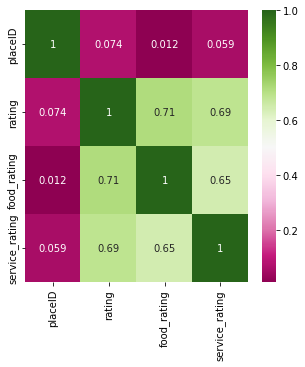

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sns
mp.rcParams["figure.figsize"] = (5,5)
dataplot = sns.heatmap(rating_final_df.corr(), cmap="PiYG", annot=True)
mp.show()

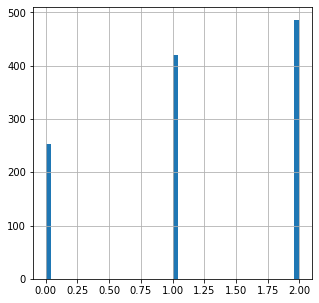

In [ ]:
# Another way to plot a histogram of rating is shown below
rating_final_df['rating'].hist(bins=50)

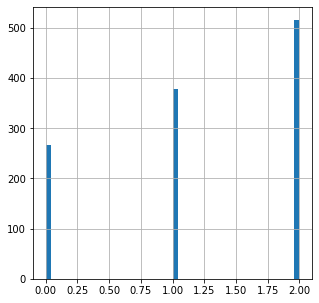

In [ ]:
# Another way to plot a histogram of food_rating is shown below
rating_final_df['food_rating'].hist(bins=50)

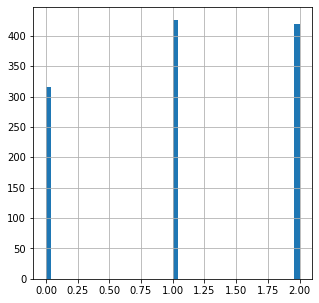

In [ ]:
# Another way to plot a histogram of service_rating is shown below
rating_final_df['service_rating'].hist(bins=50)

### Explore the Consumers files
#### usercuisine.csv file

In [ ]:
#Getting top five rows
usercuisine_df.head()

,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch


In [ ]:
#Getting information of shape and size
usercuisine_df.shape

(330, 2)

In [ ]:
#Checking for null values
usercuisine_df.isnull().sum()

userID      0
Rcuisine    0
dtype: int64

In [ ]:
#Describe the dataset
usercuisine_df['Rcuisine'].describe()

count         330
unique        103
top       Mexican
freq           97
Name: Rcuisine, dtype: object

#### userpayment.csv

In [ ]:
#Getting Top five rows
userpayment_df.head()

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards


In [ ]:
#Getting information of shape 
userpayment_df.shape

(177, 2)

In [ ]:
#Checking for null values
userpayment_df.isnull().sum()

userID      0
Upayment    0
dtype: int64

In [ ]:
#Describe the dataset
userpayment_df['Upayment'].describe()

count      177
unique       5
top       cash
freq       131
Name: Upayment, dtype: object

#### userprofile.csv

In [ ]:
#Getting top five rows
userprofile_df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [ ]:
#Describe the dataset
userprofile_df[['smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status', 'hijos',
       'interest', 'personality', 'religion', 'activity',
       'color','budget']].describe()

,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget
count,138,138,138,138,138,138,138,138,138,138,138,138,138
unique,3,3,5,4,4,4,4,5,4,5,5,8,4
top,false,abstemious,no preference,family,public,single,independent,variety,hard-worker,Catholic,student,blue,medium
freq,109,51,53,70,82,122,113,50,61,99,113,45,91


In [ ]:
#Getting information of shape 
userprofile_df.shape

(138, 19)

#### combined all user according to their userID

Now combine all user of all three .csv file according to their userID and get their unique value, so that it is easy to compare.

In [ ]:
user_all = np.concatenate((usercuisine_df.userID, userpayment_df.userID, userprofile_df.userID))
user_all = np.sort( np.unique(user_all) ) #UserID's of all theree users
len(user_all)

138

There are total 138 users in the database

In [ ]:
#Check the column present in user profile
userprofile_df.columns.values

array(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status',
       'hijos', 'birth_year', 'interest', 'personality', 'religion',
       'activity', 'color', 'weight', 'budget', 'height'], dtype=object)

On analysis, we found that only

 'smoker','drink_level','transport','budget','dress_preference','ambience','activity','interest' are more effective features which mostly effect the results. I will take only these features for further analysis.

In [ ]:
#Taking some important features from userprofile_df and print their value counts
features_user =userprofile_df[['smoker','drink_level','transport','budget','dress_preference','ambience','activity','interest']]
#Getting all information about features users
for col in features_user.columns.values:
        print(features_user[col].value_counts() , "\n--------------------------------------\n")

false    109
true      26
?          3
Name: smoker, dtype: int64 
--------------------------------------

abstemious        51
casual drinker    47
social drinker    40
Name: drink_level, dtype: int64 
--------------------------------------

public       82
car owner    35
on foot      14
?             7
Name: transport, dtype: int64 
--------------------------------------

medium    91
low       35
?          7
high       5
Name: budget, dtype: int64 
--------------------------------------

no preference    53
formal           41
informal         35
?                 5
elegant           4
Name: dress_preference, dtype: int64 
--------------------------------------

family      70
friends     46
solitary    16
?            6
Name: ambience, dtype: int64 
--------------------------------------

student          113
professional      15
?                  7
unemployed         2
working-class      1
Name: activity, dtype: int64 
--------------------------------------

variety         50


Here we see that some values from transport and dress_preference have same category, so we replace those value with common value for analysis purpose.

In [ ]:
#Replace some values of column which is similar type
features_user['transport'] = features_user['transport'].replace({'public':'no car','on foot':'no car'}) 
features_user['dress_preference'] = features_user['dress_preference'].replace({'elegant':'formal'})  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Replace the '\?' value with nan to all 'workclass', 'occupation', 'native_country' columns
for col in features_user.columns:
    features_user[col] = (features_user[col].replace({'?': np.NaN}))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Drop the row having all value is Nan
(features_user.dropna(axis=0, how='all')).head()

,smoker,drink_level,transport,budget,dress_preference,ambience,activity,interest
0,false,abstemious,no car,medium,informal,family,student,variety
1,false,abstemious,no car,low,informal,family,student,technology
2,false,social drinker,no car,low,formal,family,student,none
3,false,abstemious,no car,medium,informal,family,professional,variety
4,false,abstemious,no car,medium,no preference,family,student,none


In [ ]:
features_user.to_csv(r'/content/sample_data/a', index=False)

#### Plotting graph of some categorical data from user profile using plotly



In [ ]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=14f3126a574dd27dc2b13ea2a0874b8b8fce3c75ad2c6f303de9f79d3a486d32
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 

from chart_studio import plotly

InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

#Plotly Offline brings interactive Plotly graphs to the offline (local) environment
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
import chart_studio.plotly as plty
from plotly.graph_objs import *
py.init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [ ]:
#Getting some features of categorical data which is important
features_user_col=features_user.columns

In [ ]:
#Method for plotting 

def plot_value_counts(col_name,table=False,bar=False):
    
    values_count = pd.DataFrame(features_user[col_name].value_counts())
    values_count.columns = ['count']
   
    # Converting the index column into value count
    values_count[col_name] = [ str(i) for i in values_count.index ]
    
    # add a column with the percentage of each data point to the sum of all data points
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    
    # change the order of the columns.
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)    
    
    if bar :
        # add a font size for annotations0 which is relevant to the length of the data points.
        font_size = 20 - (.25 * len(values_count[col_name]))
        
        trace0 = gobj.Bar( x = values_count[col_name], y = values_count['count'] )
        data_ = gobj.Data( [trace0] )
        
        annotations0 = [ dict(x = xi,
                             y = yi, 
                             showarrow=False,
                             font={'size':font_size},
                             text = "{:,}".format(yi),
                             xanchor='center',
                             yanchor='bottom' )
                       for xi,yi,_ in values_count.values ]
        
        annotations1 = [ dict( x = xi,
                              y = yi/2,
                              showarrow = False,
                              text = "{}%".format(pi),
                              xanchor = 'center',
                              yanchor = 'center',
                              font = {'color':'yellow'})
                         for xi,yi,pi in values_count.values if pi > 10 ]
        
        annotations = annotations0 + annotations1                       
        
        layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                             titlefont = {'size': 50},
                             yaxis = {'title':'count'},
                             xaxis = {'type':'category'},
                            annotations = annotations  )
        figure = gobj.Figure( data = data_, layout = layout )
        py.iplot(figure)
    
    if table : 
        values_count['count'] = values_count['count'].apply(lambda d : "{:,}".format(d))
        table = ff.create_table(values_count,index_title="race")      #Creating the table for race
        py.iplot(table)
    
    return values_count

### Combined Analysis

Now we will make a data frame of all 938 restaurant and 138 users for rating purpose. Here initially i'll put all the value of rating of all category (rating,food_rating,service_rating) restaurant-user combination to -1

In [ ]:
#Combined the rating
combined_rating = pd.DataFrame(np.zeros((len(restaurant_all),len(user_all)))-1.0,columns=user_all,index=restaurant_all)

In [ ]:
#Assign a food rating
food_rating =combined_rating.copy()  

In [ ]:
#Assign a service rating
service_rating = combined_rating.copy()

Now we assign some rating value to those pair of restaurant-user which have some rating in rating_final.csv file and rest rating remain -1.

In [ ]:
#Assign a particular value of rating for those user who has given rating
for i,j,p,q,r in zip(rating_final_df.placeID, rating_final_df.userID, rating_final_df.rating, rating_final_df.food_rating, 
                            rating_final_df.service_rating):
    combined_rating.loc[i,j] = p
    food_rating.loc[i,j] = q
    service_rating.loc[i,j] = r

Now i'll review all rating of user-restaurant combination which having some rating in rating_final.csv file.Now assign 0 for no rating and 1 for rating.

In [ ]:
#Rastaurant-user pair rating, 0 means no rating and 1 means yes rating
review_rate = pd.DataFrame( np.zeros(combined_rating.shape),columns=user_all,index=restaurant_all)
review_rate[combined_rating >= 0] = 1

In [ ]:
# For the different cuisine categories of the restaurants use dummy variable
cuisine_res = pd.get_dummies(chefmozcuisine_df,columns=['Rcuisine'])

In [ ]:
#Applying groupby on placeID for removing duplicate restaurant ID's
cuisine_res = cuisine_res.groupby('placeID',as_index=False).sum()

In [ ]:
cuisine_res.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,Rcuisine_Soup,Rcuisine_Southern,Rcuisine_Southwestern,Rcuisine_Spanish,Rcuisine_Steaks,Rcuisine_Sushi,Rcuisine_Thai,Rcuisine_Turkish,Rcuisine_Vegetarian,Rcuisine_Vietnamese
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#For different cuisine categories of the restaurants use dummy variable
parking_res = pd.get_dummies(chefmozparking_df,columns=['parking_lot'])

In [ ]:
#Applying groupby on placeID for removing duplicate restaurant ID's
parking_res= parking_res.groupby('placeID',as_index=False).sum()

In [ ]:
parking_res.head()

,placeID,parking_lot_fee,parking_lot_none,parking_lot_public,parking_lot_street,parking_lot_valet parking,parking_lot_validated parking,parking_lot_yes
0,132012,0,0,1,1,0,0,0
1,132023,1,0,1,0,0,0,0
2,132024,0,0,0,1,0,0,0
3,132026,1,0,0,0,0,0,0
4,132030,0,0,0,1,0,0,0


In [ ]:
# Taking some features which are more relevant
features_res = geoplaces2_df[['placeID','alcohol','smoking_area','Rambience','other_services','price','dress_code',
                    'accessibility','area']]

In [ ]:
#Applying groupby on placeID for removing duplicate restaurant ID's
restaurant_df = pd.DataFrame({'placeID': restaurant_all})
restaurant_df.head()

,placeID
0,132001
1,132002
2,132003
3,132004
4,132005


Left join on restaurant_df, using common place ID

Here we will merge restaurant file with cuisine,parking and features columns on placeID to get all important features which will effect the result.

In [ ]:
#Merge the restaurant_df according to cuisine,parking and features
restaurant_df = pd.merge(left=restaurant_df, right=cuisine_res, how="left", on="placeID")
restaurant_df = pd.merge(left=restaurant_df, right=parking_res, how="left", on="placeID")
restaurant_df = pd.merge(left=restaurant_df, right=features_res, how="left", on="placeID")
restaurant_df.head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,parking_lot_validated parking,parking_lot_yes,alcohol,smoking_area,Rambience,other_services,price,dress_code,accessibility,area
0,132001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,132004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Getting the placeID's for all 938 restaurant having rating
rated_res = restaurant_all[np.sum(review_rate,axis=1) > 0]

In [ ]:
# Check for restaurant has rating, 0 means No and 1 means Yes.
Rate = review_rate.loc[rated_res].values
Rate

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Assigning combined,food and service rating of combined restaurant file
combined_Y = combined_rating.loc[rated_res].values
food_Y  = food_rating.loc[rated_res].values
service_Y = service_rating.loc[rated_res].values

In [ ]:
#Getting index value of restaurant_df having rating value
index = [x in rated_res for x in restaurant_df['placeID'].values]

In [ ]:
# Features for all 938 restaurant having rating
X_val = restaurant_df.loc[index, :].reset_index(drop=True)

In [ ]:
X_val.isnull().sum() # all the NANs are from cuisine

placeID               0
Rcuisine_Afghan      35
Rcuisine_African     35
Rcuisine_American    35
Rcuisine_Armenian    35
                     ..
other_services        0
price                 0
dress_code            0
accessibility         0
area                  0
Length: 75, dtype: int64

In [ ]:
#Fill the na value with zero
X_val.fillna(0).head()

,placeID,Rcuisine_Afghan,Rcuisine_African,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Asian,Rcuisine_Bagels,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,...,parking_lot_validated parking,parking_lot_yes,alcohol,smoking_area,Rambience,other_services,price,dress_code,accessibility,area
0,132560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,No_Alcohol_Served,permitted,familiar,none,low,informal,no_accessibility,open
1,132561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,No_Alcohol_Served,none,familiar,none,low,informal,completely,closed
2,132564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,No_Alcohol_Served,none,familiar,none,low,informal,completely,closed
3,132572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,No_Alcohol_Served,not permitted,familiar,none,low,informal,completely,closed
4,132583,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,No_Alcohol_Served,not permitted,familiar,none,low,informal,partially,closed


In [ ]:
# drop a feature if the entire column are 0
features_to_drop = X_val.columns.values[np.sum(X_val,axis=0) == 0] 
X_val = X_val.drop(features_to_drop, axis=1)
X_val.head()

,placeID,Rcuisine_American,Rcuisine_Armenian,Rcuisine_Bakery,Rcuisine_Bar,Rcuisine_Bar_Pub_Brewery,Rcuisine_Breakfast-Brunch,Rcuisine_Burgers,Rcuisine_Cafe-Coffee_Shop,Rcuisine_Cafeteria,...,parking_lot_valet parking,parking_lot_yes,alcohol,smoking_area,Rambience,other_services,price,dress_code,accessibility,area
0,132560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,No_Alcohol_Served,permitted,familiar,none,low,informal,no_accessibility,open
1,132561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,No_Alcohol_Served,none,familiar,none,low,informal,completely,closed
2,132564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,No_Alcohol_Served,none,familiar,none,low,informal,completely,closed
3,132572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,No_Alcohol_Served,not permitted,familiar,none,low,informal,completely,closed
4,132583,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,No_Alcohol_Served,not permitted,familiar,none,low,informal,partially,closed


In [ ]:
#Columns in X_val which contain placeID,cuisine,parking and some features from geo file.
X_val.columns

Index(['placeID', 'Rcuisine_American', 'Rcuisine_Armenian', 'Rcuisine_Bakery',
       'Rcuisine_Bar', 'Rcuisine_Bar_Pub_Brewery', 'Rcuisine_Breakfast-Brunch',
       'Rcuisine_Burgers', 'Rcuisine_Cafe-Coffee_Shop', 'Rcuisine_Cafeteria',
       'Rcuisine_Chinese', 'Rcuisine_Contemporary', 'Rcuisine_Family',
       'Rcuisine_Fast_Food', 'Rcuisine_Game', 'Rcuisine_International',
       'Rcuisine_Italian', 'Rcuisine_Japanese', 'Rcuisine_Mediterranean',
       'Rcuisine_Mexican', 'Rcuisine_Pizzeria', 'Rcuisine_Regional',
       'Rcuisine_Seafood', 'Rcuisine_Vietnamese', 'parking_lot_none',
       'parking_lot_public', 'parking_lot_valet parking', 'parking_lot_yes',
       'alcohol', 'smoking_area', 'Rambience', 'other_services', 'price',
       'dress_code', 'accessibility', 'area'],
      dtype='object')

In [ ]:
# drop placeID for getting only important features which will effect the result
X_val = X_val.drop(['placeID'], axis=1)

In [ ]:
X_val.dtypes

Rcuisine_American            float64
Rcuisine_Armenian            float64
Rcuisine_Bakery              float64
Rcuisine_Bar                 float64
Rcuisine_Bar_Pub_Brewery     float64
Rcuisine_Breakfast-Brunch    float64
Rcuisine_Burgers             float64
Rcuisine_Cafe-Coffee_Shop    float64
Rcuisine_Cafeteria           float64
Rcuisine_Chinese             float64
Rcuisine_Contemporary        float64
Rcuisine_Family              float64
Rcuisine_Fast_Food           float64
Rcuisine_Game                float64
Rcuisine_International       float64
Rcuisine_Italian             float64
Rcuisine_Japanese            float64
Rcuisine_Mediterranean       float64
Rcuisine_Mexican             float64
Rcuisine_Pizzeria            float64
Rcuisine_Regional            float64
Rcuisine_Seafood             float64
Rcuisine_Vietnamese          float64
parking_lot_none             float64
parking_lot_public           float64
parking_lot_valet parking    float64
parking_lot_yes              float64
a

In [ ]:
#Categorize the column of dataset which is object type 
for col in X_val.columns:
    if X_val[col].dtype == object:
        X_val[col] = X_val[col].astype('category')

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rcuisine_American          95 non-null     float64 
 1   Rcuisine_Armenian          95 non-null     float64 
 2   Rcuisine_Bakery            95 non-null     float64 
 3   Rcuisine_Bar               95 non-null     float64 
 4   Rcuisine_Bar_Pub_Brewery   95 non-null     float64 
 5   Rcuisine_Breakfast-Brunch  95 non-null     float64 
 6   Rcuisine_Burgers           95 non-null     float64 
 7   Rcuisine_Cafe-Coffee_Shop  95 non-null     float64 
 8   Rcuisine_Cafeteria         95 non-null     float64 
 9   Rcuisine_Chinese           95 non-null     float64 
 10  Rcuisine_Contemporary      95 non-null     float64 
 11  Rcuisine_Family            95 non-null     float64 
 12  Rcuisine_Fast_Food         95 non-null     float64 
 13  Rcuisine_Game              95 non-n

### Plotting the above features using plotly

In [ ]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

#Plotly Offline brings interactive Plotly graphs to the offline (local) environment
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
from plotly.graph_objs import *
py.init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [ ]:
#Method for plotting 

def plot_value_counts(col_name,table=False,bar=False):
    
    values_count = pd.DataFrame(X_val[col_name].value_counts())
    values_count.columns = ['count']
   
    # Converting the index column into value count
    values_count[col_name] = [ str(i) for i in values_count.index ]
    
    # add a column with the percentage of each data point to the sum of all data points
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    
    # change the order of the columns.
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)    
    
    if bar :
        # add a font size for annotations0 which is relevant to the length of the data points.
        font_size = 20 - (.25 * len(values_count[col_name]))
        
        trace0 = gobj.Bar( x = values_count[col_name], y = values_count['count'] )
        data_ = gobj.Data( [trace0] )
        
        annotations0 = [ dict(x = xi,
                             y = yi, 
                             showarrow=False,
                             font={'size':font_size},
                             text = "{:,}".format(yi),
                             xanchor='center',
                             yanchor='bottom' )
                       for xi,yi,_ in values_count.values ]
        
        annotations1 = [ dict( x = xi,
                              y = yi/2,
                              showarrow = False,
                              text = "{}%".format(pi),
                              xanchor = 'center',
                              yanchor = 'center',
                              font = {'color':'yellow'})
                         for xi,yi,pi in values_count.values if pi > 10 ]
        
        annotations = annotations0 + annotations1                       
        
        layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                             titlefont = {'size': 50},
                             yaxis = {'title':'count'},
                             xaxis = {'type':'category'},
                            annotations = annotations  )
        figure = gobj.Figure( data = data_, layout = layout )
        py.iplot(figure)
    
    if table : 
        values_count['count'] = values_count['count'].apply(lambda d : "{:,}".format(d))
        table = ff.create_table(values_count,index_title="race")      #Creating the table for race
        py.iplot(table)
    
    return values_count

### Calculate the mean rating of restaurant

In [ ]:
#Method to get mean value
def calculate_Mean(col1,col2):
    col1 = col1*col2
    mean =  (np.sum(col1,axis=1)/np.sum((col2 == 1.0), axis=1)).reshape(col1.shape[0],1)
    return mean

In [ ]:
#Taking mean value of all kind of rating like combined rating, food rating, service rating
combined_mean_Y = calculate_Mean(combined_Y,Rate)
food_mean_Y = calculate_Mean(food_Y,Rate)
service_mean_Y = calculate_Mean(service_Y,Rate)

#### Plotting mean value of all rating by using matplotlib

In [ ]:
#Method to to print the ratings of different groups of restaurants based on different value

def mean_rating_plotting(df,rotate=False):
    
    n = df.shape[1]
    columns = df.columns.values
    
    if n > 1:
        combined_y = [ combined_mean_Y[df[i] == 1].mean() for i in columns ]
        food_y = [food_mean_Y[df[i] == 1].mean() for i in columns ]
        service_y = [service_mean_Y[df[i] == 1].mean() for i in columns ] 
        y = pd.DataFrame({'combined':combined_y, 'food':food_y, 'service':service_y},
                         columns=['combined','food','service'],index=columns) 
        ticks = columns
        
    else:
        values = df[columns[0]].unique()
        values = values[values != '?']
        combined_y = [combined_mean_Y[df[columns[0]] == i].mean() for i in values ]
        food_y = [food_mean_Y[df[columns[0]] == i].mean() for i in values ]
        service_y = [service_mean_Y[df[columns[0]] == i].mean() for i in values ] 
        y = pd.DataFrame({'combined':combined_y, 'food':food_y, 'service':service_y},
                         columns=['combined','food','service'],index=values) 
        ticks = values
   
    fig = plt.figure()
    plt.plot(range(y.shape[0]),y['combined'],'-o',c='g',label='overall')
    plt.plot(range(y.shape[0]),y['food'],'-o',c='r',label='food')   
    plt.plot(range(y.shape[0]),y['service'],'-o',c='b',label='service')
    plt.xticks(range(y.shape[0]),ticks,fontsize=13)
    if rotate: plt.xticks(rotation=40)
    plt.yticks(fontsize=13) 
    if n == 1: plt.xlabel(columns[0],fontsize=15)
    plt.ylabel('mean rating',fontsize=15)
    plt.legend(fontsize=15,frameon=False)
    plt.show()
    
    print(y)

In [ ]:
X_val.columns

Index(['Rcuisine_American', 'Rcuisine_Armenian', 'Rcuisine_Bakery',
       'Rcuisine_Bar', 'Rcuisine_Bar_Pub_Brewery', 'Rcuisine_Breakfast-Brunch',
       'Rcuisine_Burgers', 'Rcuisine_Cafe-Coffee_Shop', 'Rcuisine_Cafeteria',
       'Rcuisine_Chinese', 'Rcuisine_Contemporary', 'Rcuisine_Family',
       'Rcuisine_Fast_Food', 'Rcuisine_Game', 'Rcuisine_International',
       'Rcuisine_Italian', 'Rcuisine_Japanese', 'Rcuisine_Mediterranean',
       'Rcuisine_Mexican', 'Rcuisine_Pizzeria', 'Rcuisine_Regional',
       'Rcuisine_Seafood', 'Rcuisine_Vietnamese', 'parking_lot_none',
       'parking_lot_public', 'parking_lot_valet parking', 'parking_lot_yes',
       'alcohol', 'smoking_area', 'Rambience', 'other_services', 'price',
       'dress_code', 'accessibility', 'area'],
      dtype='object')

In [ ]:
features_col=['parking_lot_none',
       'parking_lot_public', 'parking_lot_valet parking', 'parking_lot_yes',
       'alcohol', 'smoking_area', 'Rambience', 'other_services', 'price',
       'dress_code', 'accessibility', 'area']

#### Analysing some features_col by using matplotlib

In [ ]:
#Getting price detail
X_val.price.value_counts()

medium    60
low       45
high      25
Name: price, dtype: int64

In [ ]:
#Finding budget detail
userprofile_df.budget.value_counts()

medium    91
low       35
?          7
high       5
Name: budget, dtype: int64

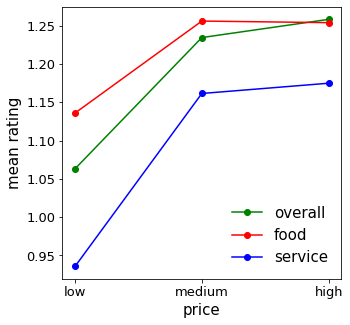

        combined      food   service
low     1.063059  1.135805  0.935632
medium  1.234342  1.255871  1.161361
high    1.258106  1.253816  1.174754


In [ ]:
# plotting the mean rating as a function of price
mean_rating_plotting(X_val[['price']])

In [ ]:
#Taking subset of features which is imoortant for parking 
columns = ['parking_lot_none','parking_lot_public', 'parking_lot_valet parking','parking_lot_yes']
X_val[columns].sum()

parking_lot_none             65.0
parking_lot_public           16.0
parking_lot_valet parking     3.0
parking_lot_yes              46.0
dtype: float64

In [ ]:
#Finding the tital sum of parking features
X_val[columns].sum().sum()

130.0

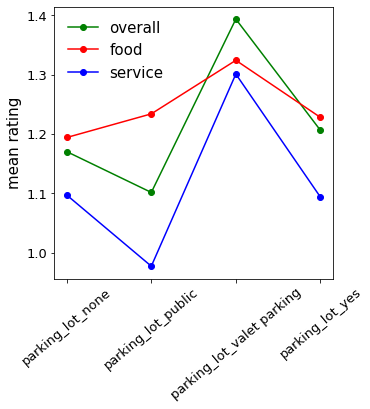

                           combined      food   service
parking_lot_none           1.170202  1.194014  1.097035
parking_lot_public         1.101438  1.233839  0.977173
parking_lot_valet parking  1.393519  1.324074  1.300926
parking_lot_yes            1.206176  1.227920  1.093676


In [ ]:
# finding mean rating of parking features
mean_rating_plotting(X_val[columns], rotate=True)

In [ ]:
X_val.price[X_val['parking_lot_valet parking']==1].value_counts()

high      3
low       0
medium    0
Name: price, dtype: int64

In [ ]:
X_val.price[X_val['parking_lot_public']==1].value_counts()

medium    8
low       7
high      1
Name: price, dtype: int64

In [ ]:
X_val.price[X_val['parking_lot_none']==1].value_counts()

low       31
medium    29
high       5
Name: price, dtype: int64

In [ ]:
X_val.smoking_area.value_counts()

none             70
not permitted    25
section          24
permitted         9
only at bar       2
Name: smoking_area, dtype: int64

In [ ]:
features_user.smoker.value_counts()

false    109
true      26
Name: smoker, dtype: int64

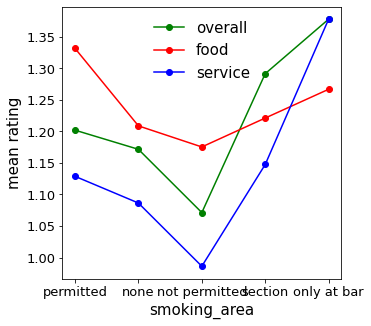

               combined      food   service
permitted      1.201852  1.331481  1.128704
none           1.171497  1.208648  1.086371
not permitted  1.071238  1.175244  0.986184
section        1.291368  1.221073  1.147479
only at bar    1.377778  1.266667  1.377778


In [ ]:
# Mean rating of smoking area 
mean_rating_plotting(X_val[['smoking_area']])

In [ ]:
X_val.alcohol.value_counts()

No_Alcohol_Served    87
Wine-Beer            34
Full_Bar              9
Name: alcohol, dtype: int64

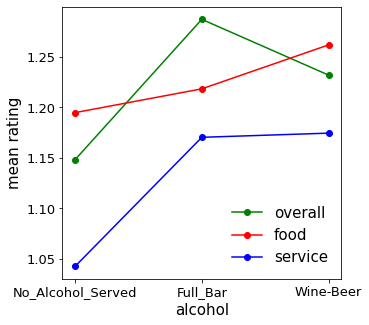

                   combined      food   service
No_Alcohol_Served  1.148075  1.194730  1.042417
Full_Bar           1.287124  1.218315  1.170311
Wine-Beer          1.231887  1.261840  1.174437


In [ ]:
# mean rating as a function of alcohol
mean_rating_plotting(X_val[['alcohol']])

In [ ]:
X_val.price[X_val.alcohol == 'No_Alcohol_Served'].value_counts()

medium    41
low       39
high       7
Name: price, dtype: int64

In [ ]:
X_val.price[X_val.alcohol == 'Wine-Beer'].value_counts()

medium    15
high      14
low        5
Name: price, dtype: int64

In [ ]:
X_val.price[X_val.alcohol == 'Full_Bar'].value_counts()

high      4
medium    4
low       1
Name: price, dtype: int64

In [ ]:
X_val.other_services.value_counts()

none        119
variety       7
Internet      4
Name: other_services, dtype: int64

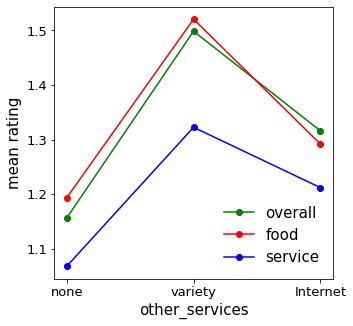

          combined      food   service
none      1.156273  1.193252  1.067643
variety   1.498639  1.520748  1.322449
Internet  1.315972  1.291667  1.211806


In [ ]:
# mean rating as a function of other_services
mean_rating_plotting(X_val[['other_services']])

In [ ]:
X_val.price[X_val.other_services == 'variety'].value_counts()

medium    4
low       2
high      1
Name: price, dtype: int64

In [ ]:
X_val.price[X_val.other_services == 'none'].value_counts()

medium    53
low       43
high      23
Name: price, dtype: int64

In [ ]:
X_val.dress_code.value_counts()

informal    118
casual       10
formal        2
Name: dress_code, dtype: int64

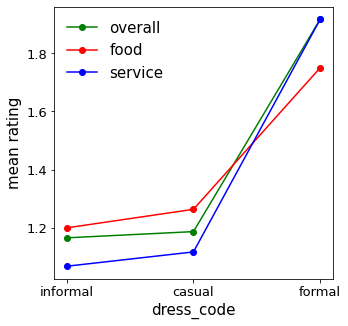

          combined      food   service
informal  1.166441  1.200562  1.068978
casual    1.187739  1.264256  1.118116
formal    1.916667  1.750000  1.916667


In [ ]:
# Mean rating of dress code function
mean_rating_plotting(X_val[['dress_code']])

In [ ]:
X_val.price[X_val.dress_code == 'formal'].value_counts()

high      1
medium    1
low       0
Name: price, dtype: int64

In [ ]:
X_val.price[X_val.dress_code == 'informal'].value_counts()

medium    57
low       40
high      21
Name: price, dtype: int64

In [ ]:
X_val.price[X_val.dress_code == 'casual'].value_counts()

low       5
high      3
medium    2
Name: price, dtype: int64

In [ ]:
X_val.accessibility.value_counts()

no_accessibility    76
completely          45
partially            9
Name: accessibility, dtype: int64

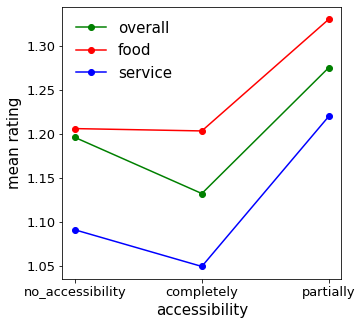

                  combined      food   service
no_accessibility  1.196189  1.206242  1.091278
completely        1.132494  1.203597  1.049709
partially         1.275356  1.330294  1.219991


In [ ]:
# mean rating as a function of dress accessibility
mean_rating_plotting(X_val[['accessibility']])

In [ ]:
X_val.price[X_val.accessibility == 'partially'].value_counts()

medium    8
low       1
high      0
Name: price, dtype: int64

In [ ]:
X_val.price[X_val.accessibility == 'no_accessibility'].value_counts()

medium    39
high      23
low       14
Name: price, dtype: int64

In [ ]:
X_val.price[X_val.accessibility == 'completely'].value_counts()

low       30
medium    13
high       2
Name: price, dtype: int64

In [ ]:
X_val.area.value_counts()

closed    115
open       15
Name: area, dtype: int64

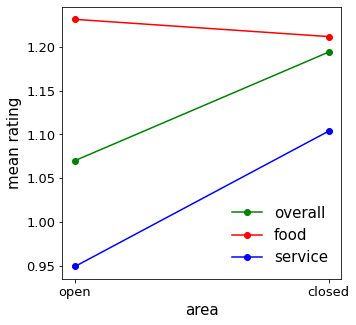

        combined      food   service
open    1.069992  1.231315  0.949101
closed  1.193921  1.211645  1.103630


In [ ]:
# mean rating as a function of area
mean_rating_plotting(X_val[['area']])

## K Nearest Neighbors

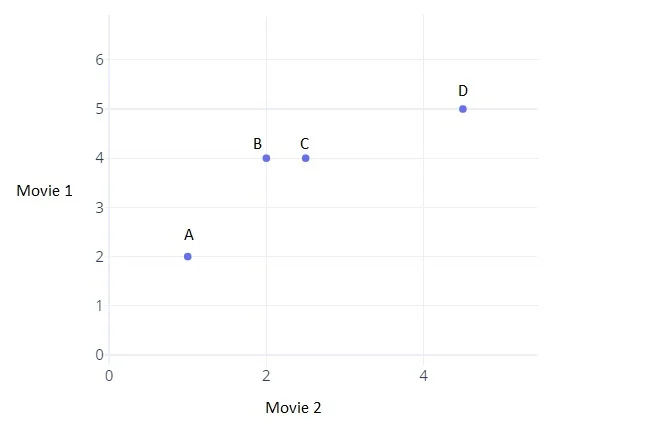

The two approaches are mathematically quite similar, but there is a conceptual difference between the two. Here’s how the two compare:

1. **User-based:** For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

2. **Item-based:** For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.

We will be using User based collaborative filtering technique for listing top recommendations for any user.